### Dog cat classifier 

In [1]:
import os 
import numpy as np 
import cv2    # opencv 
from PIL import Image

In [2]:
image_path = r"C:\Users\Ranjit\Desktop\offline batch\dog_cat\images\cats\cat_15.jpg"


In [3]:
cat_image = Image.open(image_path)

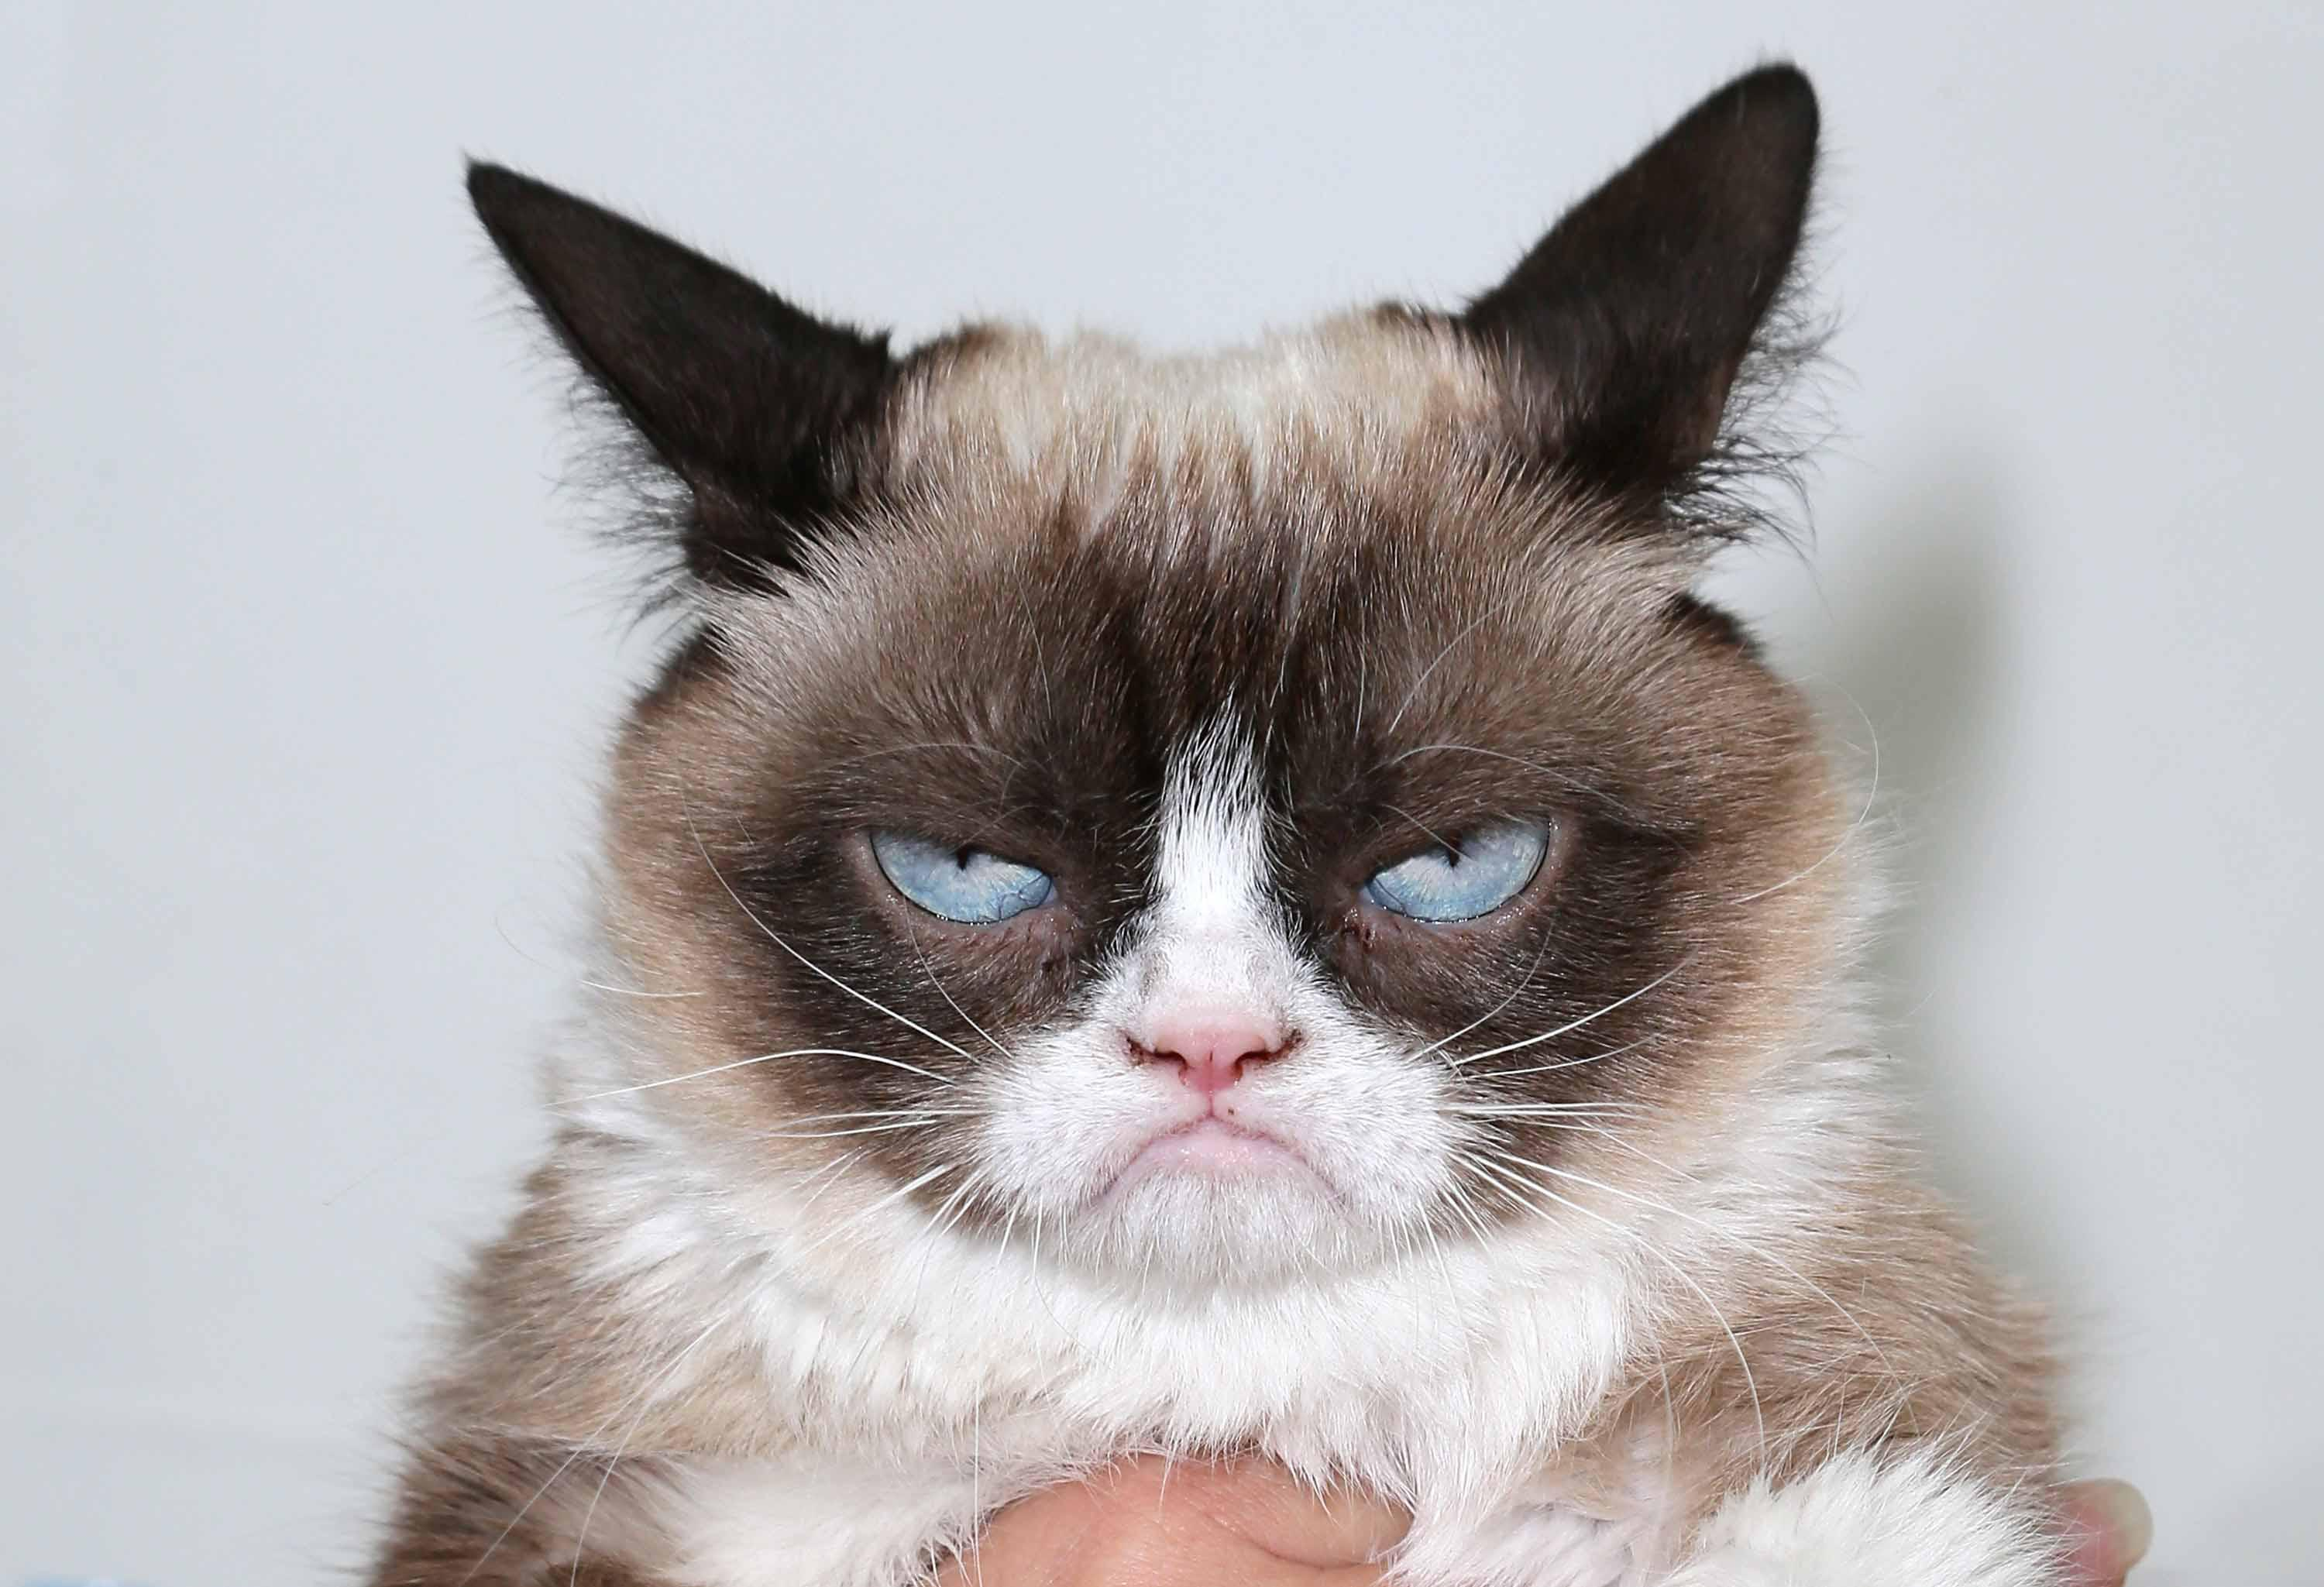

In [4]:
cat_image

In [5]:
cat_img_array = np.array(cat_image)
cat_img_array

array([[[210, 217, 225],
        [210, 217, 225],
        [210, 217, 225],
        ...,
        [208, 211, 216],
        [208, 211, 216],
        [208, 211, 216]],

       [[210, 217, 225],
        [210, 217, 225],
        [210, 217, 225],
        ...,
        [208, 211, 216],
        [208, 211, 216],
        [208, 211, 216]],

       [[210, 217, 225],
        [210, 217, 225],
        [210, 217, 225],
        ...,
        [208, 211, 216],
        [208, 211, 216],
        [208, 211, 216]],

       ...,

       [[199, 206, 214],
        [199, 206, 214],
        [199, 206, 214],
        ...,
        [193, 192, 198],
        [193, 192, 198],
        [193, 192, 198]],

       [[199, 206, 214],
        [199, 206, 214],
        [199, 206, 214],
        ...,
        [192, 193, 198],
        [193, 192, 198],
        [192, 193, 198]],

       [[199, 206, 214],
        [199, 206, 214],
        [199, 206, 214],
        ...,
        [188, 191, 196],
        [190, 191, 196],
        [188, 191, 196]]

In [3]:
path_dict = {'cats':[],'dogs':[]}
image_folder_path = r"C:\Users\Ranjit\Desktop\offline batch\dog_cat\images"
for dir in os.listdir(image_folder_path):
    directory_path = os.path.join(image_folder_path,dir)
    for item in os.listdir(directory_path): 
        item_path = os.path.join(directory_path,item) 
        path_dict[dir].append(item_path)
print("we have successfully done our task!")

we have successfully done our task!


In [4]:
len(path_dict['dogs'])  # dogs images 

348

In [5]:
len(path_dict['cats'])  # cats images 


349

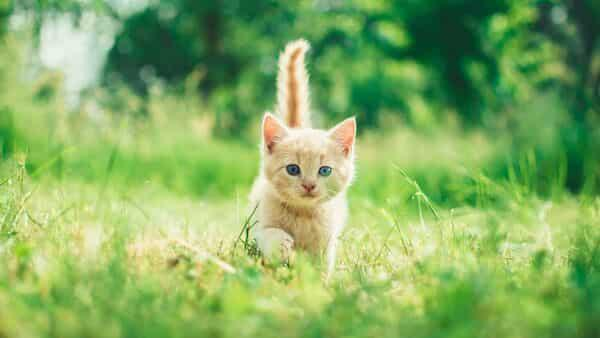

In [6]:
Image.open(path_dict['cats'][15])

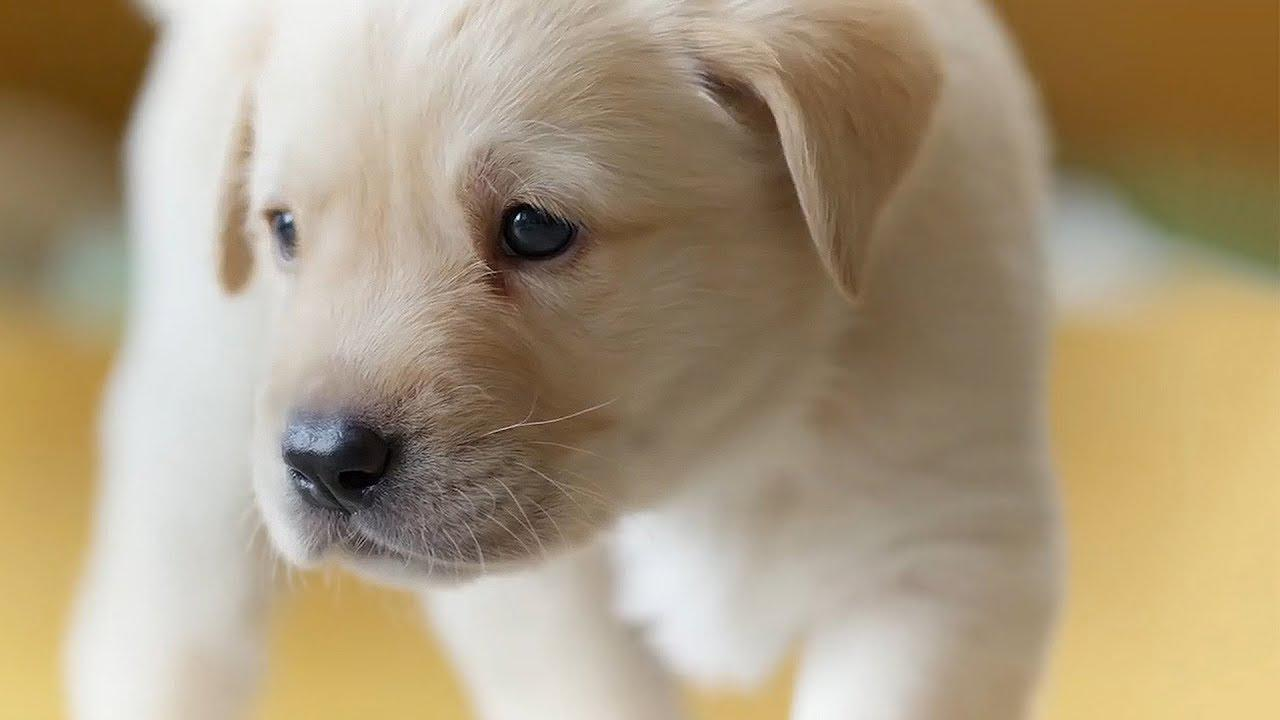

In [7]:
Image.open(path_dict['dogs'][45])

In [8]:
# images read with the help of path 

# Image.open() 
first_image = cv2.imread(path_dict['cats'][74])
first_image_resized = cv2.resize(first_image,(244,244))
first_image_resized.shape 

(244, 244, 3)

In [10]:
# independent and dependent variables 
x = []  # ---> all images in the form of array
y = []  # ---> labels 

for key,value in path_dict.items():
    for path in value:
        image_loaded = cv2.imread(path)
        image_resized = cv2.resize(image_loaded,(224,224))
        x.append(image_resized) 
        y.append(key) 
        
    

In [11]:
y = [1 if clas =="dogs" else 0  for clas in y]  # list comprehension

# for clas in y:
#     if clas =="dogs":
#         print(1)
#     else:
#         0


In [12]:
X = np.array(x)
Y = np.array(y)

In [13]:
X.shape  

(697, 224, 224, 3)

In [14]:
Y.shape  # labels 

(697,)

In [28]:
import matplotlib.pyplot as plt 

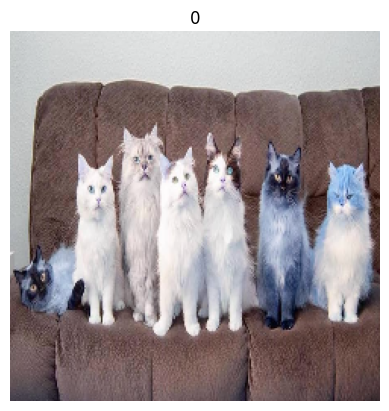

In [35]:
plt.imshow(X[45])
plt.title(Y[45])
plt.axis('off')
plt.show()

# dogs = 1 
# cats = 0 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# training testing split 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

## Using transfer learning techniques

In [18]:
# Normlize 
X_train = x_train/255.0
X_test = x_test/255.0
X_train.shape , y_train.shape

((557, 224, 224, 3), (557,))

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

In [21]:
Model = ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)

In [22]:
Model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [23]:
# we dont want to train the layers of pretraine model 
for layer in Model.layers:
    layer.trainable = False

In [24]:
Model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [27]:
custome_model = Sequential([Model,
layers.Flatten(),
layers.Dense(units=64,activation='relu'),  # hidden 1st 
layers.Dense(units=48,activation='relu'),  # hidden 2nd
layers.Dense(units=1,activation='sigmoid')]) # output layer 

custome_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
custome_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 30013473 (114.49 MB)
Trainable params: 6425761 (24.51 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [28]:

x_train.shape , y_train.shape

((557, 224, 224, 3), (557,))

In [ ]:
history = custome_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


18/18 [==============================] - 103s 5s/step - loss: 0.9320 - accuracy: 0.5027 - val_loss: 0.6855 - val_accuracy: 0.5571
Epoch 2/10
18/18 [==============================] - 84s 5s/step - loss: 0.6766 - accuracy: 0.5548 - val_loss: 0.6730 - val_accuracy: 0.5857
Epoch 3/10
18/18 [==============================] - 72s 4s/step - loss: 0.6688 - accuracy: 0.6014 - val_loss: 0.6688 - val_accuracy: 0.6071
Epoch 4/10
18/18 [==============================] - 71s 4s/step - loss: 0.6313 - accuracy: 0.6320 - val_loss: 0.6797 - val_accuracy: 0.5857
Epoch 5/10
18/18 [==============================] - 73s 4s/step - loss: 0.7632 - accuracy: 0.5655 - val_loss: 0.8323 - val_accuracy: 0.5286
Epoch 6/10
18/18 [==============================] - 74s 4s/step - loss: 0.6400 - accuracy: 0.6248 - val_loss: 0.6750 - val_accuracy: 0.6000
Epoch 7/10
18/18 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.6050

In [40]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [41]:
import random 

In [43]:
ls = ['A','B','C','D','E','F']
ls 

['A', 'B', 'C', 'D', 'E', 'F']

In [44]:
random.shuffle(ls)

In [45]:
ls 

['B', 'A', 'E', 'C', 'F', 'D']

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # 0 - 1 

In [50]:
# normalize pixel 0 - 1 , minmax scaler 
X_test = x_test/255.0
X_train = x_train/255.0

In [54]:
X_test.shape

(140, 244, 244, 3)

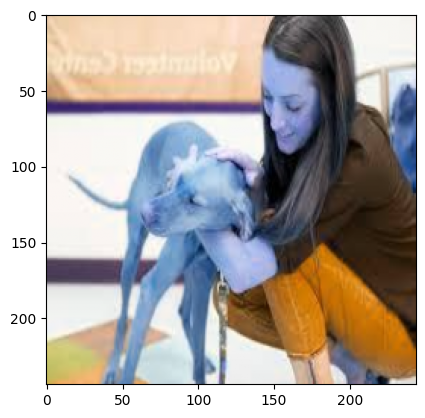

In [53]:
plt.imshow(X_test[2])
plt.show()

In [56]:
x_train.shape 

(557, 244, 244, 3)

In [59]:
#### Model training  CNN - Define 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [68]:
model = Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(244, 244, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32,(3,3),activation='relu'),

    layers.Flatten(), 
    #ann layers 
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=30,activation='relu'),

    #output layer 
    layers.Dense(units=1,activation='sigmoid')]
) 

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 121, 121, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 119, 119, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 57, 57, 32)        9248      
                                                                 
 flatten_3 (Flatten)         (None, 103968)           

In [ ]:
# # pooling  
# 1. max pooling 
# 2. min pooling 
# 3. mean pooling 


# max(0,z)

In [62]:
# model = Sequential([
#     layers.Conv2D(32,(3,3),activation='relu',input_shape=(244, 244, 3)),
#     layers.MaxPooling2D((2,2)),])

In [65]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0])

In [69]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5


18/18 [==============================] - 24s 1s/step - loss: 107.3583 - accuracy: 0.5081 - val_loss: 0.9369 - val_accuracy: 0.5571
Epoch 2/5
18/18 [==============================] - 18s 1s/step - loss: 0.6357 - accuracy: 0.6499 - val_loss: 0.7166 - val_accuracy: 0.5929
Epoch 3/5
18/18 [==============================] - 24s 1s/step - loss: 0.4738 - accuracy: 0.8079 - val_loss: 0.8046 - val_accuracy: 0.5929
Epoch 4/5
18/18 [==============================] - 22s 1s/step - loss: 0.2073 - accuracy: 0.9282 - val_loss: 0.9721 - val_accuracy: 0.6571
Epoch 5/5
18/18 [==============================] - 25s 1s/step - loss: 0.0824 - accuracy: 0.9695 - val_loss: 1.2713 - val_accuracy: 0.6286


In [ ]:
# Training score High and testing score low   ----> 
# training score =  96 
# testing score  = 62 

# 1. dataset small 
# 2. model high architectur 
#3.  images resolution 

In [72]:
model2 = Sequential([
    layers.Conv2D(24,(3,3),activation='relu',input_shape=(244, 244, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(16,(3,3),activation='relu'),

    layers.Flatten(), 
    #ann layers 
    layers.Dense(units=12,activation='relu'),

    #output layer 
    layers.Dense(units=1,activation='sigmoid')]
) 

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 242, 242, 24)      672       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 121, 121, 24)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 119, 119, 16)      3472      
                                                                 
 flatten_5 (Flatten)         (None, 226576)            0         
                                                                 
 dense_14 (Dense)            (None, 12)                2718924   
                                                                 
 dense_15 (Dense)            (None, 1)                 13        
                                                      

In [73]:
history2 = model2.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))


Epoch 1/5
18/18 [==============================] - 10s 393ms/step - loss: 238.3299 - accuracy: 0.5314 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
18/18 [==============================] - 7s 372ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
18/18 [==============================] - 7s 376ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
18/18 [==============================] - 7s 377ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
18/18 [==============================] - 7s 379ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# 244  244 3 
# Data augmentation 


model.evaluate() # training data and testing data 
model.predict()    # probability  
confusion matrix 
confusion plot()

classification report 
model.save()




In [74]:
from tensorflow.keras.datasets import mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# MNIST 

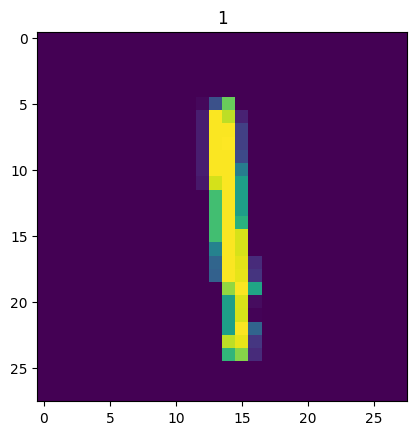

In [79]:
plt.imshow(train_images[8])
plt.title(train_labels[8])
plt.show()

# 0 - 9   # class multiclass classification  loss  , activation function  